<a href="https://colab.research.google.com/github/jakejeong5007/COVID-Lung-CT-Segmentation/blob/main/Covid_CT_LungSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone codes from github and install libraries (Take long)
!git clone https://github.com/jakejeong5007/Inf-Net
%cd Inf-Net/
!pip install -r requirements.txt
!pip install thop

In [ ]:
import gdown
import os
import glob
import matplotlib.pyplot as plt

In [2]:
# Download files that are needed
!mkdir Dataset
gdown.download("https://drive.google.com/uc?id=1bbKAqUuk7Y1q3xsDSwP07oOXN_GL3SQM", "COVID-SemiSeg.zip", True)
!unzip /content/Inf-Net/COVID-SemiSeg.zip
!mv /content/Inf-Net/COVID-SemiSeg/Dataset /content/Inf-Net
!mv /content/Inf-Net/COVID-SemiSeg/Results /content/Inf-Net
!rm -r /content/Inf-Net/COVID-SemiSeg
!rm -r /content/Inf-Net/Results
!mkdir Snapshots
%cd Snapshots/
!mkdir pre_trained
gdown.download("https://drive.google.com/uc?id=1JItS3dNsETG-ZWHKYKdXSW8aeAT5HQft", "res2net50_v1b_26w_4s-3cf99910.pth", True)
gdown.download("https://drive.google.com/uc?id=10RSq-KZI78T_eIfIMw3N-dknpkeEYJVo", "resnet50-19c8e357.pth", True)
gdown.download("https://drive.google.com/uc?id=14KX_ufz9VfAF7EJIOHQZu3-sfeOH37LR", "vgg16-397923af.pth", True)
!mv /content/Inf-Net/Snapshots/res2net50_v1b_26w_4s-3cf99910.pth /content/Inf-Net/Snapshots/pre_trained
!mv /content/Inf-Net/Snapshots/resnet50-19c8e357.pth /content/Inf-Net/Snapshots/pre_trained
!mv /content/Inf-Net/Snapshots/vgg16-397923af.pth /content/Inf-Net/Snapshots/pre_trained
!mkdir save_weights
%cd save_weights
!mkdir Inf-Net
%cd Inf-Net
gdown.download("https://drive.google.com/uc?id=19p_G8NS4NwF4pZOEOX3w06ZLVh0rj3VW", "Inf-Net.zip", True)
%cd ../../../
!mkdir Results
!unzip ./Snapshots/save_weights/Inf-Net/Inf-Net.zip
!rm ./Snapshots/save_weights/Inf-Net/Inf-Net.zip
!mv /content/Inf-Net/Inf-Net /content/Inf-Net/Snapshots/save_weights/Inf-Net
!mkdir -p Results/"Lung infection segmentation"

In [3]:
# Download new lung CT data
!wget -O patient1.jpg  http://ictcf.biocuckoo.cn/data/P1/2020_1_31_15_26_46/IMG-0001-00035.jpg
!wget -O patient2.jpg  http://ictcf.biocuckoo.cn/data/Patient30/CT/IMG-0001-00068.jpg
!wget -O patient3.jpg  http://ictcf.biocuckoo.cn/data/P3/2020_2_11_9_42_31/IMG-0001-00200.jpg
!wget -O patient4.jpg  http://ictcf.biocuckoo.cn/data/P77/2020_2_20_8_49_14/IMG-0001-00033.jpg
!wget -O patient5.jpg  http://ictcf.biocuckoo.cn/data/P25/2020_1_29_9_22_59/IMG-0001-00029.jpg 
!wget -O patient6.jpg  http://ictcf.biocuckoo.cn/data/P11/2020_2_10_10_17_19/IMG-0001-00028.jpg
!wget -O patient7.jpg  http://ictcf.biocuckoo.cn/data/P14/2020_2_21_21_22_08/IMG-0001-00207.jpg
!wget -O patient8.jpg  http://ictcf.biocuckoo.cn/data/P19/2020_1_27_15_10_32/IMG-0001-00064.jpg
!wget -O patient9.jpg  http://ictcf.biocuckoo.cn/data/P17/2020_2_3_14_34_50/IMG-0001-00233.jpg
!mv /content/Inf-Net/patient1.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs
!mv /content/Inf-Net/patient2.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs
!mv /content/Inf-Net/patient3.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs
!mv /content/Inf-Net/patient4.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs
!mv /content/Inf-Net/patient5.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs
!mv /content/Inf-Net/patient6.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs
!mv /content/Inf-Net/patient7.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs
!mv /content/Inf-Net/patient8.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs
!mv /content/Inf-Net/patient9.jpg /content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs 

In [4]:
# Testing/Inference
!python MyTest_LungInf.py --pth_path ./Snapshots/save_weights/Inf-Net/Inf-Net/Inf-Net-100.pth --save_path ./Results/"Lung infection segmentation"/

In [ ]:
# Visualize test results

test_img_path = '/content/Inf-Net/Dataset/TestingSet/LungInfection-Test/Imgs'
test_gt_path = '/content/Inf-Net/Dataset/TestingSet/LungInfection-Test/GT'
test_seg_path = '/content/Inf-Net/Results/Lung infection segmentation'

old_test_img_path = os.path.join(test_img_path,'9?.jpg')
old_test_imgs = sorted(glob.glob(old_test_img_path))

old_test_gt_path = os.path.join(test_gt_path,'9?.png')
old_test_gts = sorted(glob.glob(old_test_gt_path))

old_test_seg_path = os.path.join(test_seg_path,'9?.png')
old_test_segs = sorted(glob.glob(old_test_seg_path))

new_test_img_path = os.path.join(test_img_path,'patient?.jpg')
new_test_imgs = sorted(glob.glob(new_test_img_path))

new_test_seg_path = os.path.join(test_seg_path,'patient?.png')
new_test_segs = sorted(glob.glob(new_test_seg_path))

Visualization of some segmentation results - Old test data


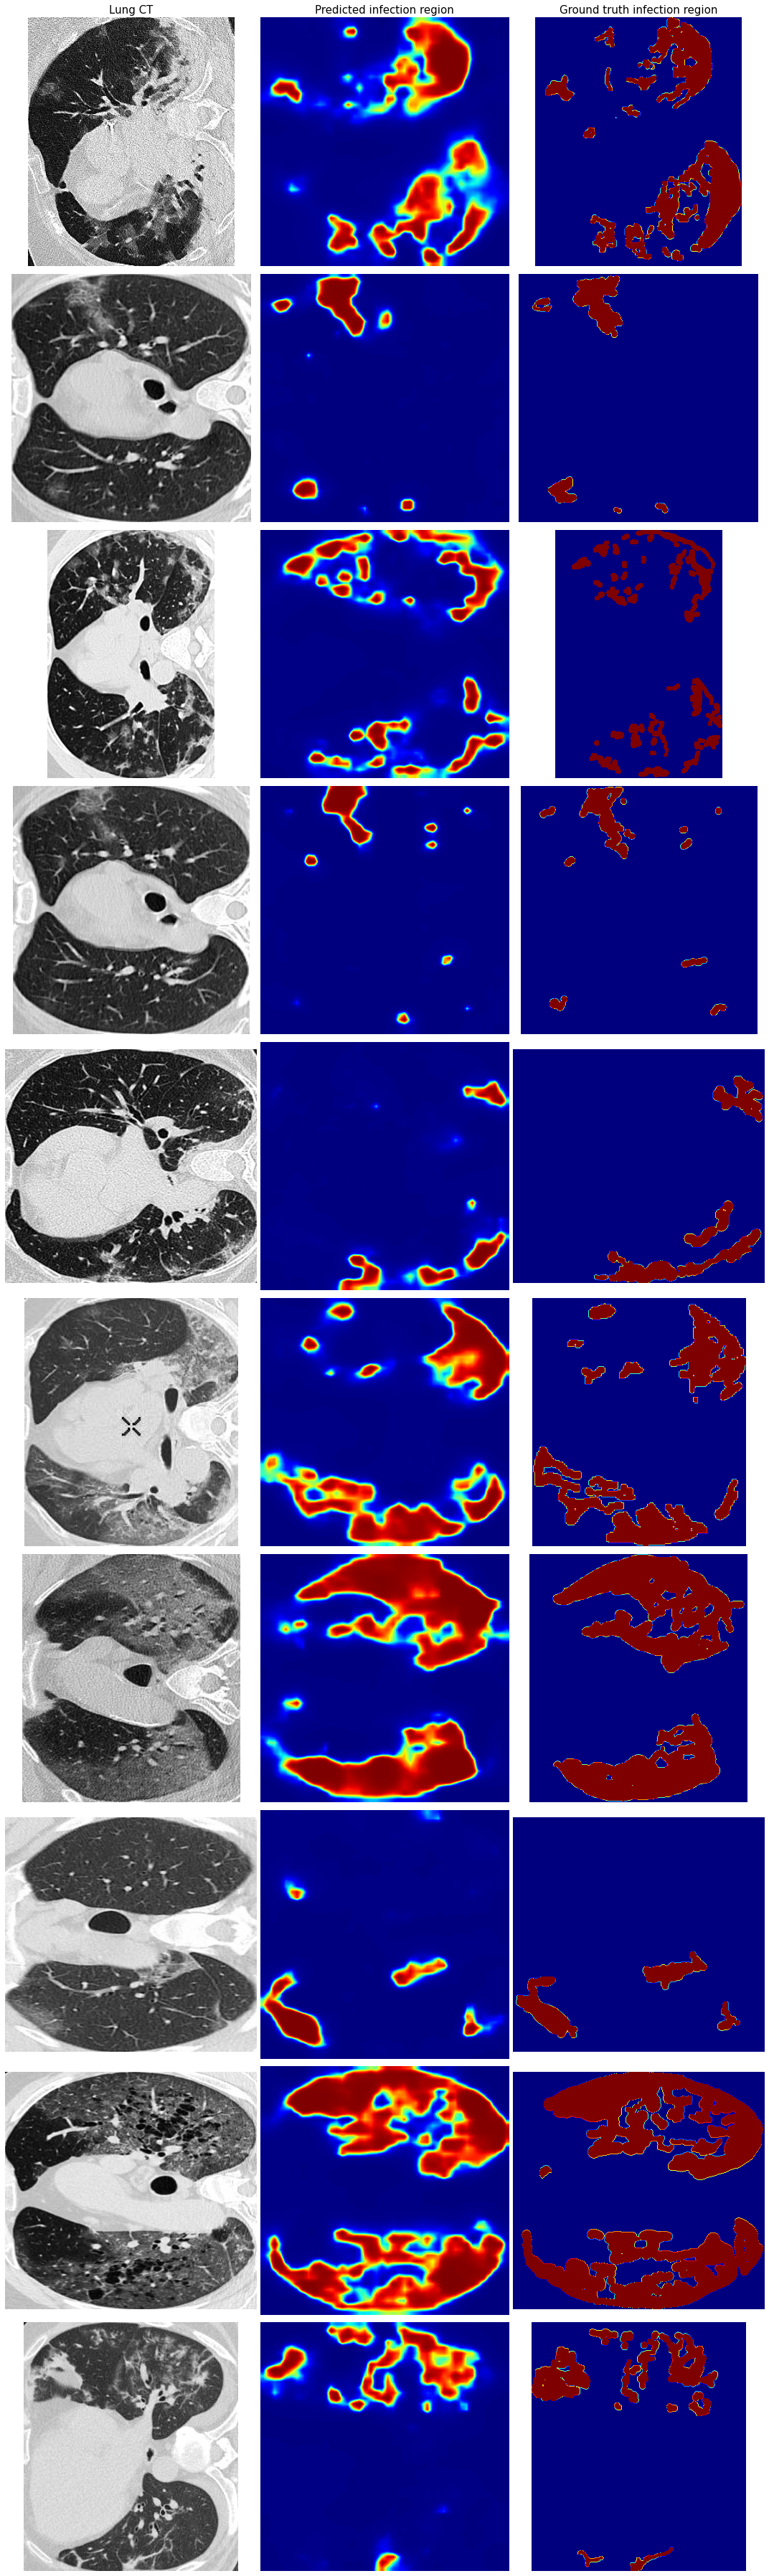

In [ ]:
# Old test data with ground truth
print('Visualization of some segmentation results - Old test data')

n_img = len(old_test_imgs)
plt.figure(figsize=(15,5*n_img))

for i in range(n_img):
  plt.subplot(n_img,3,i*3+1)
  img = plt.imread(old_test_imgs[i])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  if i==0:
    plt.title('Lung CT', fontsize=15)

  plt.subplot(n_img,3,i*3+2)
  img = plt.imread(old_test_segs[i])
  plt.imshow(img, cmap='jet')
  plt.axis('off')
  if i==0:
    plt.title('Predicted infection region', fontsize=15)

  plt.subplot(n_img,3,i*3+3)
  img = plt.imread(old_test_gts[i])
  plt.imshow(img, cmap='jet')
  plt.axis('off')
  if i==0:
    plt.title('Ground truth infection region', fontsize=15)

plt.tight_layout()
plt.show()

Visualization of some segmentation results - New test data


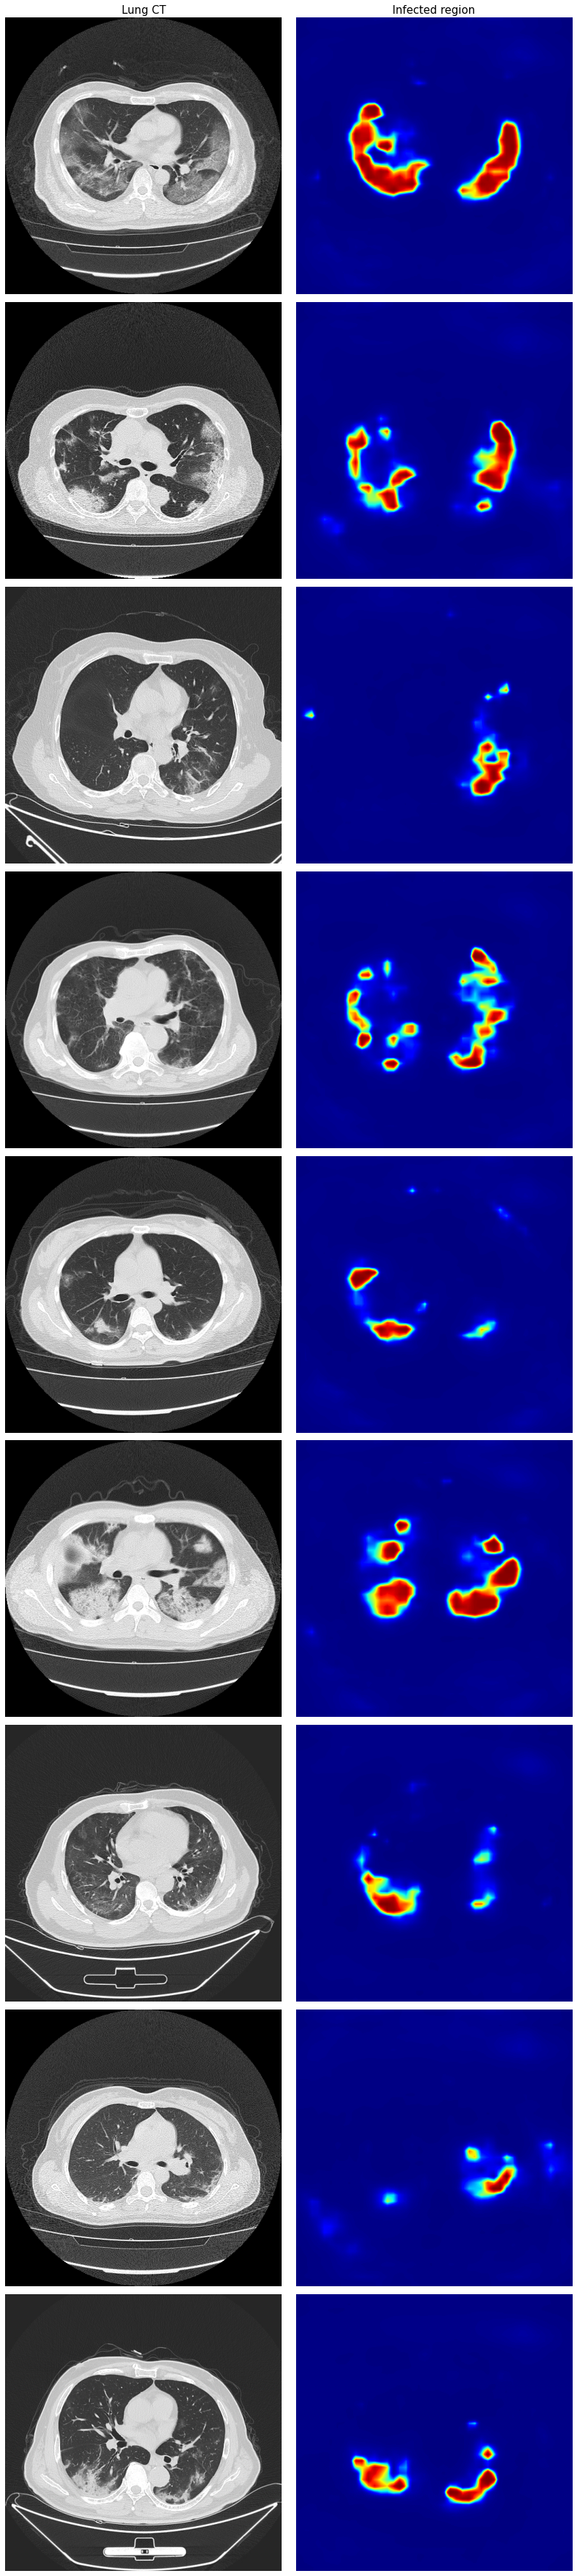

In [ ]:
# New test data with ground truth
print('Visualization of some segmentation results - New test data')

n_img = len(new_test_imgs)
plt.figure(figsize=(12,5.5*n_img))

for i in range(n_img):
  plt.subplot(n_img,2,i*2+1)
  img = plt.imread(new_test_imgs[i])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  if i==0:
    plt.title('Lung CT', fontsize=15)

  plt.subplot(n_img,2,i*2+2)
  img = plt.imread(new_test_segs[i])
  plt.imshow(img, cmap='jet')
  plt.axis('off')
  if i==0:
    plt.title('Infected region', fontsize=15)

plt.tight_layout()
plt.show()